<a href="https://colab.research.google.com/github/Gilangp/Machine-learning/blob/main/UTS/UTS_2341720042_Gilang_Purnomo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Studi Kasus 2 - CC General**
* Studi kasus ini berikaitan dengan data nasabah pengguna kartu kredit.
* Untuk mahasiswa dengan no absen 2, 5, 8, 11, dst
* Lakukan beberapa tahapan berikut dan lakukan proses analisis terhadap hasil yang dihasilkan.


# **Pra Pengolahan Data (20 poin)**

1. Load data (5 poin)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder

df = pd.read_csv('data/2_CC_GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

2. Lakukan data imputation pada data yang kosong. Lampirkan analisis Anda mengapa menggunakan metode impute tersebut. (10 poin)

In [ ]:
print(df.isnull().sum())

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [ ]:
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(), inplace=True)
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)

print(df.isnull().sum())

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


/tmp/ipython-input-1081191136.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(), inplace=True)
/tmp/ipython-input-1081191136.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

nilai kosong pada kolom CREDIT_LIMIT dan MINIMUM_PAYMENT ini diimputasi mengunakan median imputation. Metode ini dipilih karena data bersifat numerik dan mengandung outlier, sehingga median ini bisa memberikan representasi nilai yang stabil dibandingkan dengan mean.

3. Drop fitur yang tidak relevan (5 poin)

In [ ]:
df.drop(['CUST_ID'], axis=1, inplace=True)

print(df.columns)

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')


# **Clustering - 1 (30 poin)**

1. Lakukan pembuatan model cluster dengan menggunakan KMeans dengan jumlah cluster mulai 1 hingga 10. (10 poin)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

sse = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

2. Buat diagram elbow, tentukan jumlah cluster terbaik menurut elbow method dan berikan alasan. (10 poin)

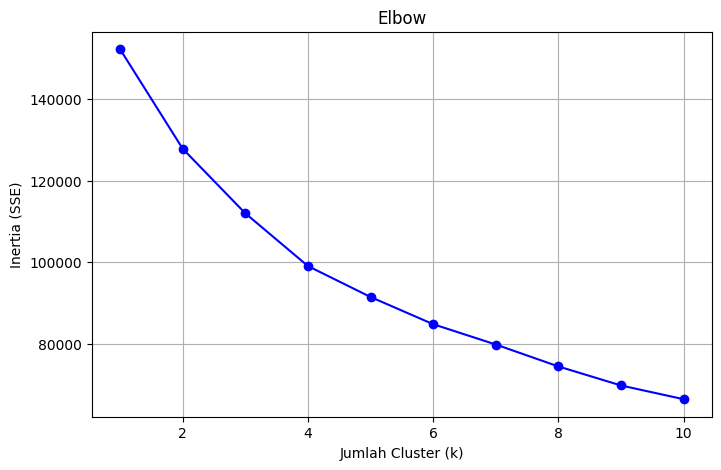

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(K, sse, 'bo-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow')
plt.grid(True)
plt.show()

Jadi jumlah cluster terbaik menurut elbow method adalah 4 cluster karena pada titik itu terjadi perubahan penurunan yang mulai melambat

3. Hitung nilai silhouette coefficient dari k=1 hingga k=10. Berdassarkan nilai silhouette, berapa jumlah cluster terbaik? Apakah sama dengan metode elbow? (10 poin)

NB: Anda diperbolehkan untuk melakukan proses normalisasi/standardisasi sebelum pembuatan model clustering. Lakukan pengamatan terhadap hasil clustering.

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    labels = kmeans.labels_
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

for k, s in zip(range(2, 11), silhouette_scores):
    print(f"k = {k}: Silhouette Score = {s:.4f}")

k = 2: Silhouette Score = 0.2100
k = 3: Silhouette Score = 0.2510
k = 4: Silhouette Score = 0.1977
k = 5: Silhouette Score = 0.1931
k = 6: Silhouette Score = 0.2029
k = 7: Silhouette Score = 0.2077
k = 8: Silhouette Score = 0.2217
k = 9: Silhouette Score = 0.2260
k = 10: Silhouette Score = 0.2204


Tidak, jumlah cluster terbaik menurut Coefficient adalah 3 cluster, berbeda dengan jumlah yang disarankan oleh Elbow Methody yaitu 4 cluster.

# **Clustering - 2 (20 poin)**

1. Lakukan pembuatan model cluster dengan menggunakan DBSCAN. Berapa jumlah cluster yang dihasilkan? (10 poin)

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score

dbscan = DBSCAN(eps=1.8 , min_samples=5)
dbscan.fit(X_scaled)

labels_dbscan = dbscan.labels_

n_clusters = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
n_noise = list(labels_dbscan).count(-1)

print(f"Jumlah cluster yang terbentuk: {n_clusters}")
print(f"Jumlah data yang terdeteksi sebagai noise: {n_noise}")

Jumlah cluster yang terbentuk: 3
Jumlah data yang terdeteksi sebagai noise: 818


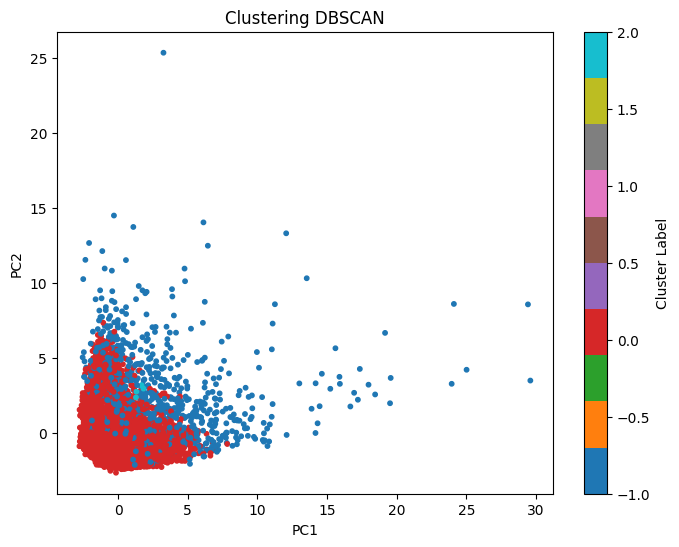

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_dbscan, cmap='tab10', s=10)
plt.title("Clustering DBSCAN")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label='Cluster Label')
plt.show()

2. Berapa nilai silhouette coefficient dan DBI dari cluster yang dihasilkan oleh DBSCAN? (10 poin)

In [ ]:
if n_clusters > 1:
    sil_score = silhouette_score(X_scaled, labels_dbscan)
    dbi_score = davies_bouldin_score(X_scaled, labels_dbscan)
else:
    sil_score = np.nan
    dbi_score = np.nan

print(f"Silhouette Coefficient: {sil_score:.4f}")
print(f"Davies-Bouldin Index (DBI): {dbi_score:.4f}")

Silhouette Coefficient: 0.1807
Davies-Bouldin Index (DBI): 1.8493


# **Feature Selection (30 poin)**

Setelah mengetahui performa hasil clustering pada model KMeans dan DBSCAN berdasakan silhouette coefficient dan DBI, lakukan proses feature selection untuk meningkatkan nilai silhouette coefficient dan DBI. Anda diperbolehkan untuk menggunakan metode iterative process atau metode yang lain.

1. Fitur apa yang memberikan nilai silhouette coefficient/DBI terbaik? Lengkapi dengan proses pemilihan fitur

In [ ]:
X = df.copy()
scaler = StandardScaler()

feature_sets = {
    'Set1_All_Features': X.columns.tolist(),
    'Set2_Pembelian_Transaksi': [
        'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE'
    ],
    'Set3_Frekuensi': [
        'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY'
    ],
    'Set4_Pembayaran': [
        'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'CREDIT_LIMIT'
    ],
    'Set5_Kombinasi_Frekuensi_dan_Pembayaran': [
        'PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT'
    ]
}

results = []
for name, cols in feature_sets.items():
    cols = [c for c in cols if c in X.columns]
    if not cols:
        continue

    X_sel = scaler.fit_transform(X[cols])

    kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_sel)

    sil = silhouette_score(X_sel, labels)
    dbi = davies_bouldin_score(X_sel, labels)

    results.append((name, sil, dbi))

for name, sil, dbi in results:
    print(f"{name:40s} | Silhouette = {sil:.4f} | DBI = {dbi:.4f}")

Set1_All_Features                        | Silhouette = 0.2510 | DBI = 1.5920
Set2_Pembelian_Transaksi                 | Silhouette = 0.6357 | DBI = 0.8823
Set3_Frekuensi                           | Silhouette = 0.6107 | DBI = 0.6807
Set4_Pembayaran                          | Silhouette = 0.4980 | DBI = 1.1176
Set5_Kombinasi_Frekuensi_dan_Pembayaran  | Silhouette = 0.3399 | DBI = 1.2127


fitur Set2 (Pembelian dan Transaksi) memberikan hasil terbaik dengan nilai yaitu Silhouette = 0.6357 dan DBI = 0.8823.

2. Mengapa Anda menggunakan metode pemilihan fitur tersebut?

Saya menggunakan metode pemilihan fitur berbasis domain karena metode ini menyesuaikan pemilihan fitur dengan konteks dan makna dari setiap variabel pada data. Pendekatan ini lebih tepat dibandingkan pemilihan acak, karena bisa mempertimbangkan aspek nyata dari perilaku pelanggan, seperti frekuensi transaksi, jumlah pembelian, dan kebiasaan pembayaran. Dengan memilih fitur yang relevan berdasarkan pemahaman terhadap data, hasil clustering dapat meningkatkan dari nilai silhouette coefficient dan menurunkan DBI, sehingga kualitas model semakin baik.

# **BONUS - CHALLENGE (30 poin)**

Buatlah model ANNOY menggunakan data yang telah melalui proses pra pengolahan data. Lakukan query dengan 5 nilai terdekat. Apakah ANNOY melakukan query pada cluster terbaik yang telah Anda bentuk?